In [1]:
import pandas as pd

import sys
import os

sys.path.insert(0,os.path.abspath("../scripts"))
# Add the src directory to the Python path
# sys.path.append(os.path.join(os.getcwd(), '../scripts'))

# Import the custom functions
import eda_functions as eda
import importlib
importlib.reload(eda)

print(dir(eda))

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'bubble_chart', 'clean_dataset', 'cleaning_impact', 'data_quality_check', 'histograms', 'load_data', 'np', 'pd', 'plot_correlation_heatmap', 'plot_pairplot', 'plot_scatter_matrix', 'plt', 'sns', 'summary_statistics', 'temperature_analysis', 'time_series_analysis', 'wind_analysis', 'z_score_analysis', 'zscore']


In [2]:
df = eda.load_data('../data/raw/benin-malanville.csv')

In [3]:
summary_stats = eda.summary_statistics(df)
print(summary_stats)

                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000000   
25%         0.000000      24.2000

In [4]:
quality_check = eda.data_quality_check(df, columns=['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust'])
print(quality_check)

{'missing_values': Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64, 'negative_values': GHI       258847
DNI       275987
DHI       259182
ModA           0
ModB           0
WS             0
WSgust         0
dtype: int64}


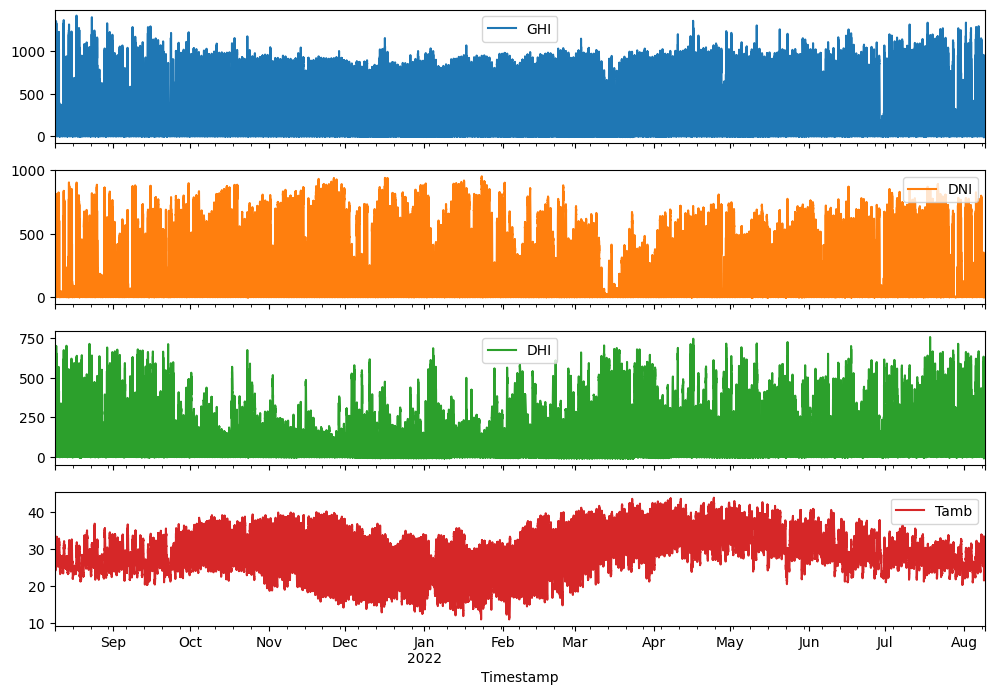

In [17]:
eda.time_series_analysis(df, date_column='Timestamp', value_columns=['GHI', 'DNI', 'DHI', 'Tamb'])

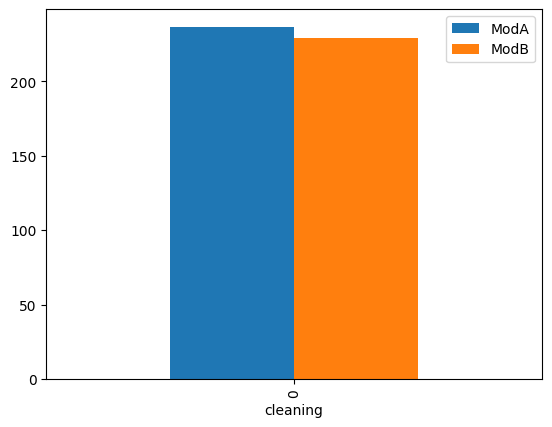

In [18]:
eda.cleaning_impact(df, cleaning_col='Cleaning', mod_columns=['ModA', 'ModB'])

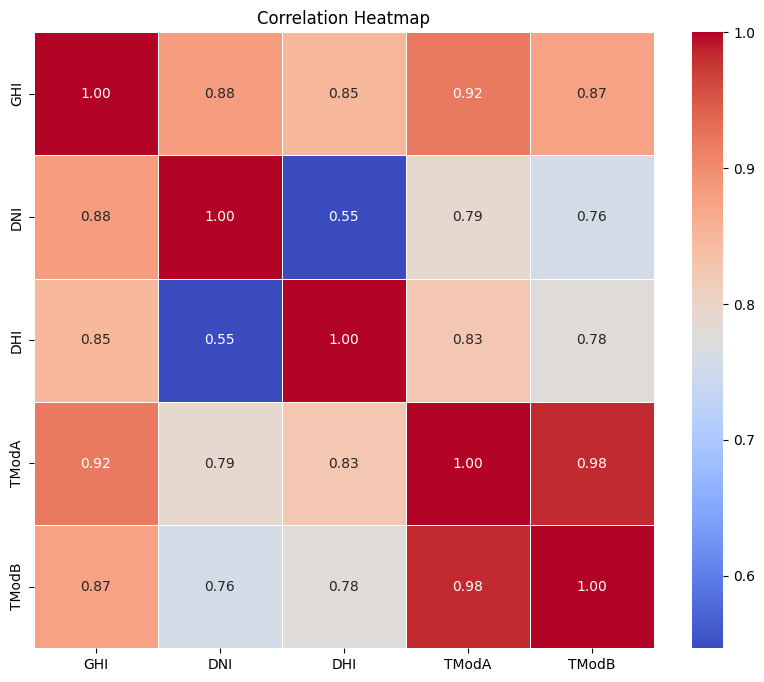

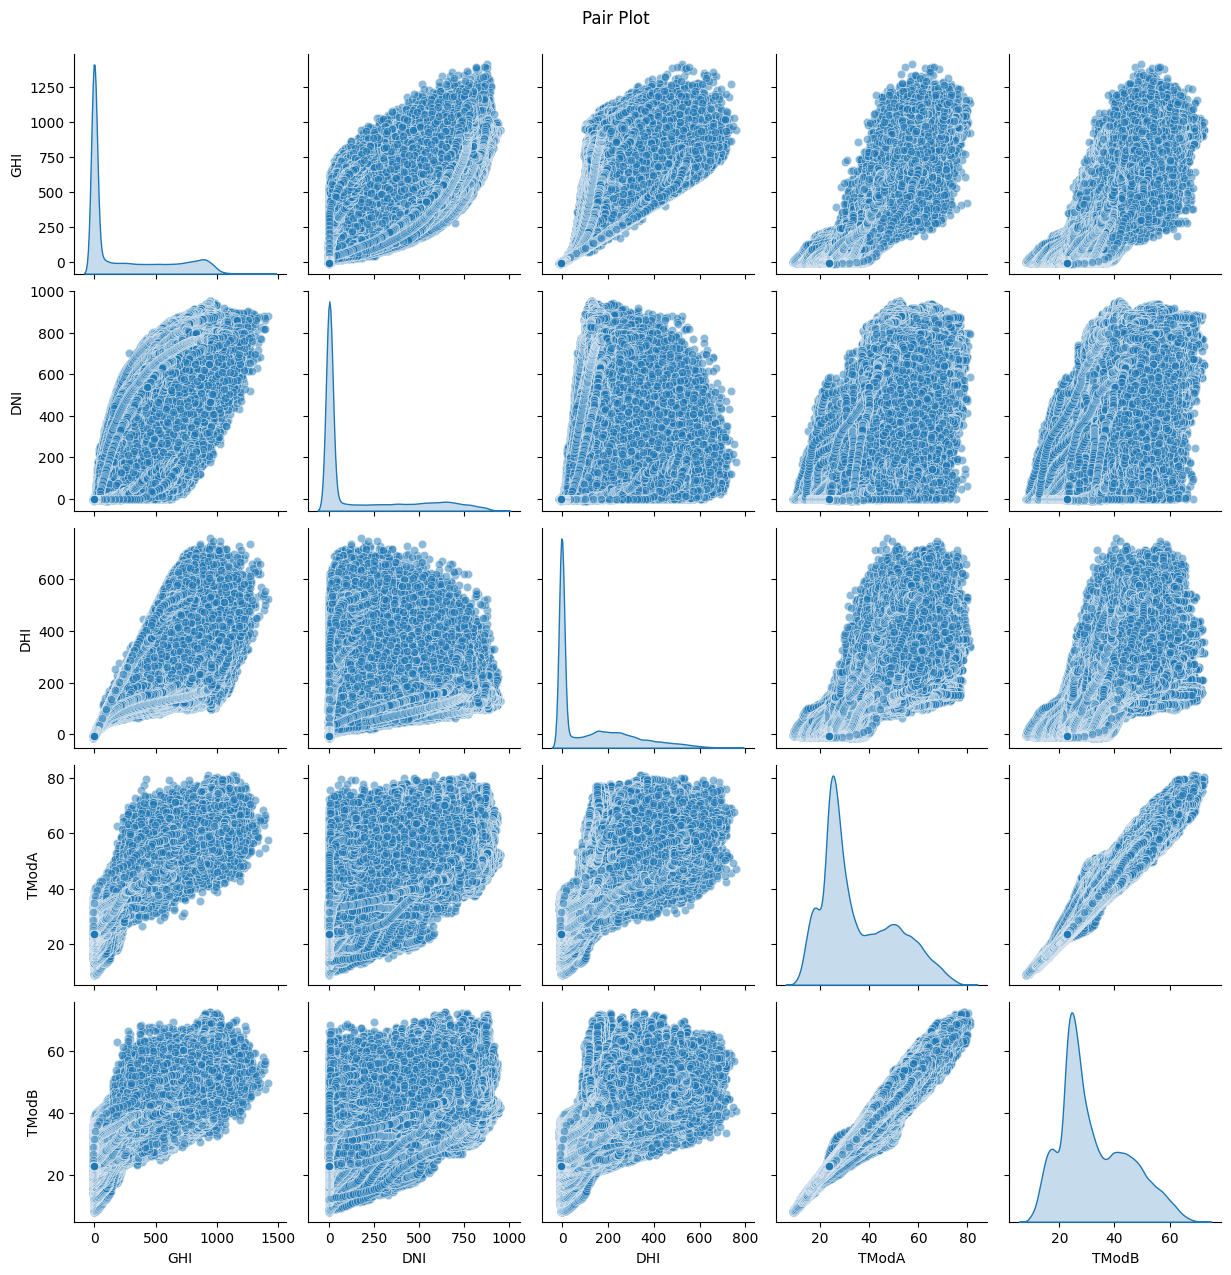

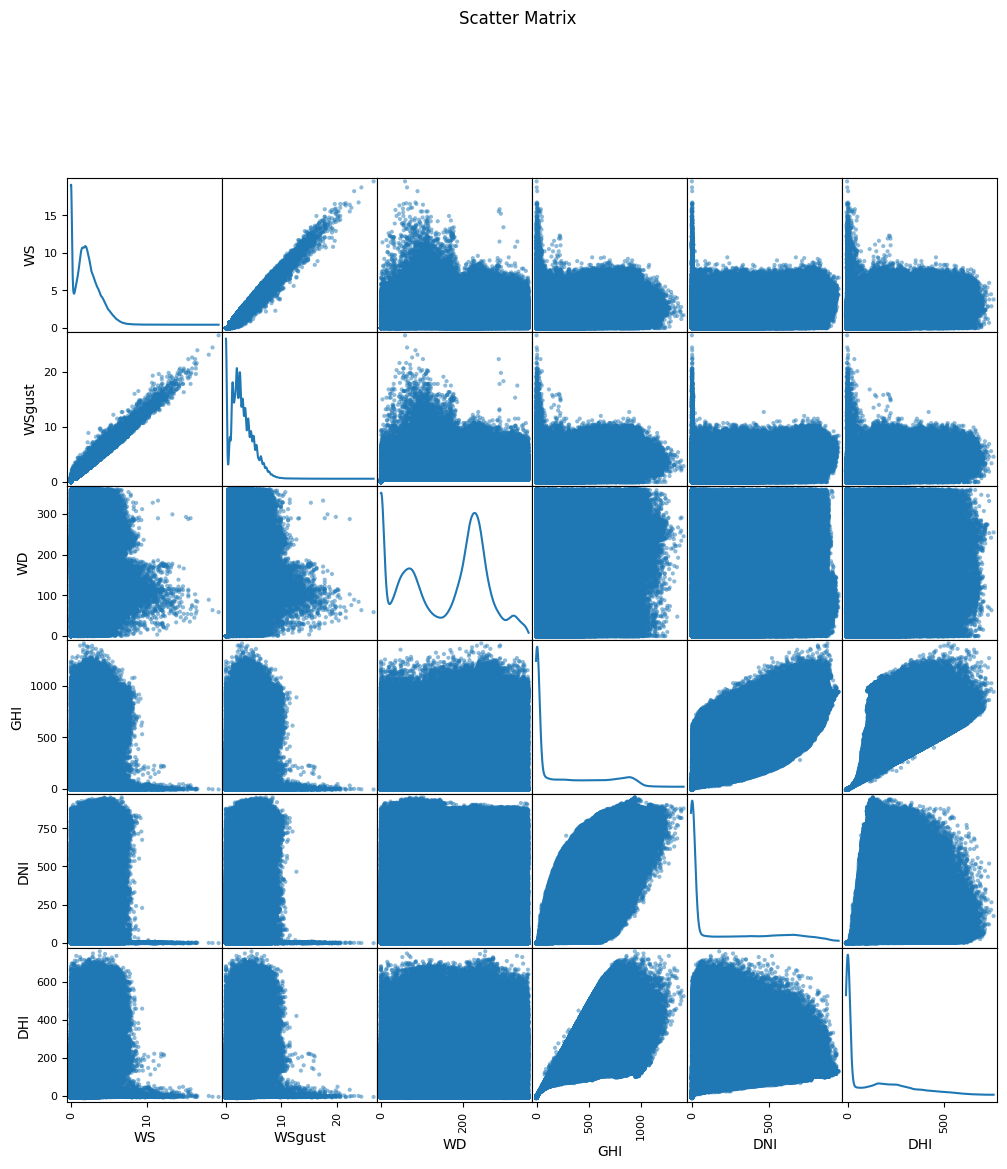

In [19]:
#Correlation analysis

# Correlation Heatmap
eda.plot_correlation_heatmap(df,columns=['GHI', 'DNI', 'DHI', 'TModA', 'TModB'])
# Pair Plot
eda.plot_pairplot(df,columns= ['GHI', 'DNI', 'DHI', 'TModA', 'TModB'])
# Scatter Matrix
eda.plot_scatter_matrix(df, columns=['WS', 'WSgust', 'WD', 'GHI', 'DNI', 'DHI'])


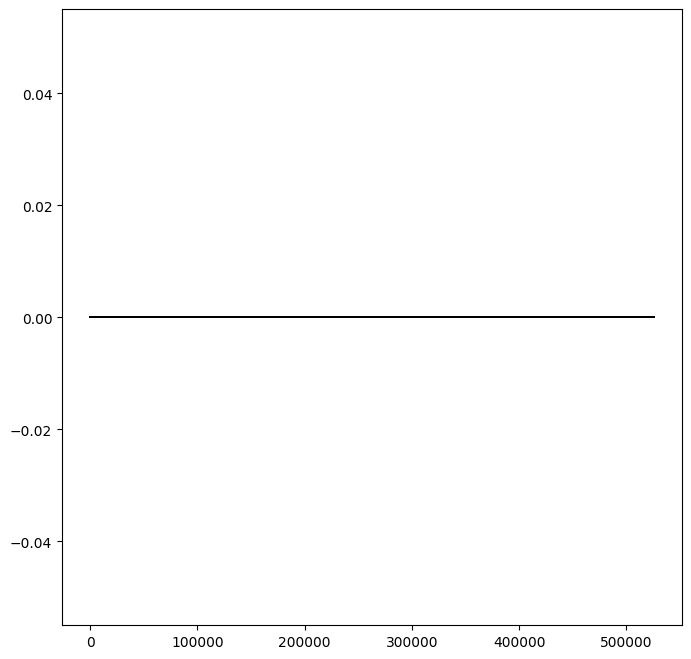

In [20]:
eda.wind_analysis(df, ws_col='WS', wd_col='WD')

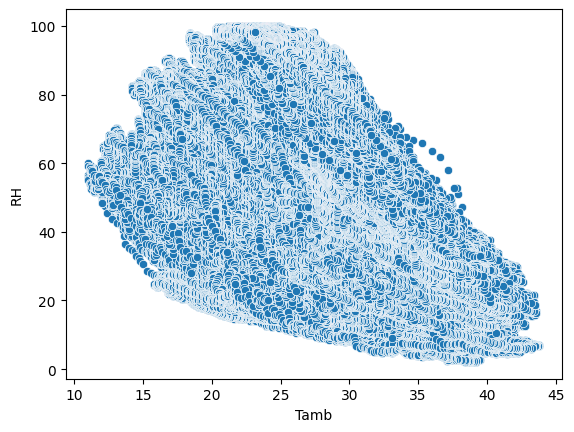

In [21]:
eda.temperature_analysis(df, temp_col='Tamb', rh_col='RH')

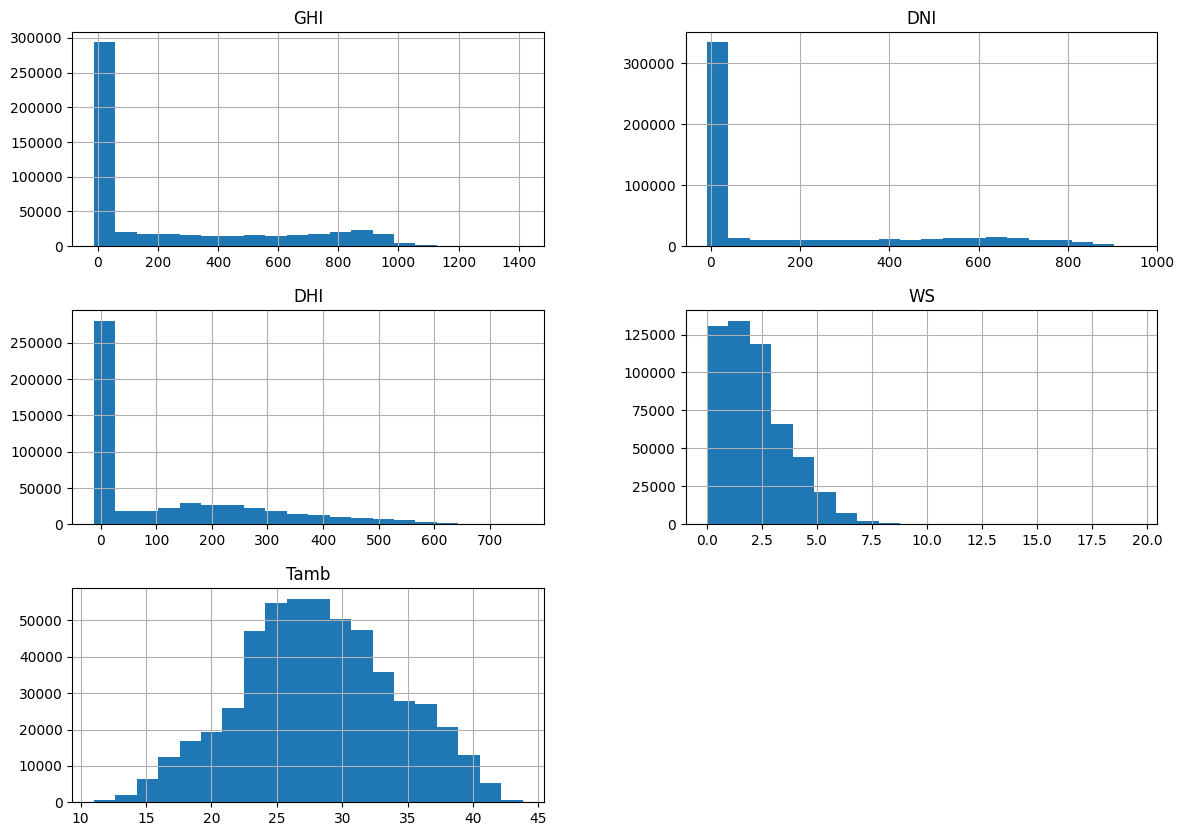

In [22]:
eda.histograms(df, columns=['GHI', 'DNI', 'DHI', 'WS', 'Tamb'])

In [23]:
outliers = eda.z_score_analysis(df, columns=['GHI', 'DNI', 'DHI'])
print("Outliers:", outliers)


Outliers: (array([   670,    671,    671, ..., 524901, 524916, 524917]), array([2, 0, 2, ..., 2, 2, 2]))


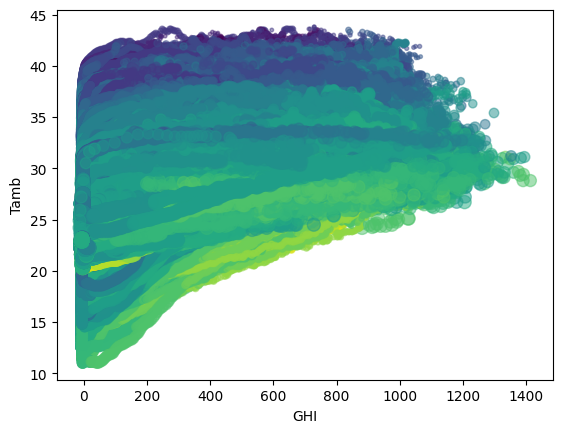

In [24]:
eda.bubble_chart(df, x_col='GHI', y_col='Tamb', size_col='RH', color_col='BP')

In [6]:
#df_cleaned = eda.clean_data(df, fill_value=0)
#Data

df_raw = pd.read_csv('../data/raw/benin-malanville.csv')
df_clean = eda.clean_data(df_raw)
df_clean.to_csv('../data/processed/benin-malanville.csv', index=False)